<a href="https://colab.research.google.com/github/DavidMartinez16/Deep-Learning-Tensorflow/blob/master/CNN_For_Cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow-gpu==2.0.0-rc0
!pip install mlxtend==0.17.0

     |████████████████████████████████| 380.5MB 35kB/s 
     |████████████████████████████████| 4.3MB 42.0MB/s 
     |████████████████████████████████| 51kB 5.4MB/s 
     |████████████████████████████████| 501kB 41.5MB/s 
     |████████████████████████████████| 1.3MB 3.2MB/s 
  Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dropout, Dense, BatchNormalization, Conv2D, MaxPool2D
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.datasets import cifar10

In [ ]:
(x_train, y_train),(x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [ ]:
classes_names = ['Airplane', 'Automobile','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck']

In [ ]:
x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
x_train.shape, x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

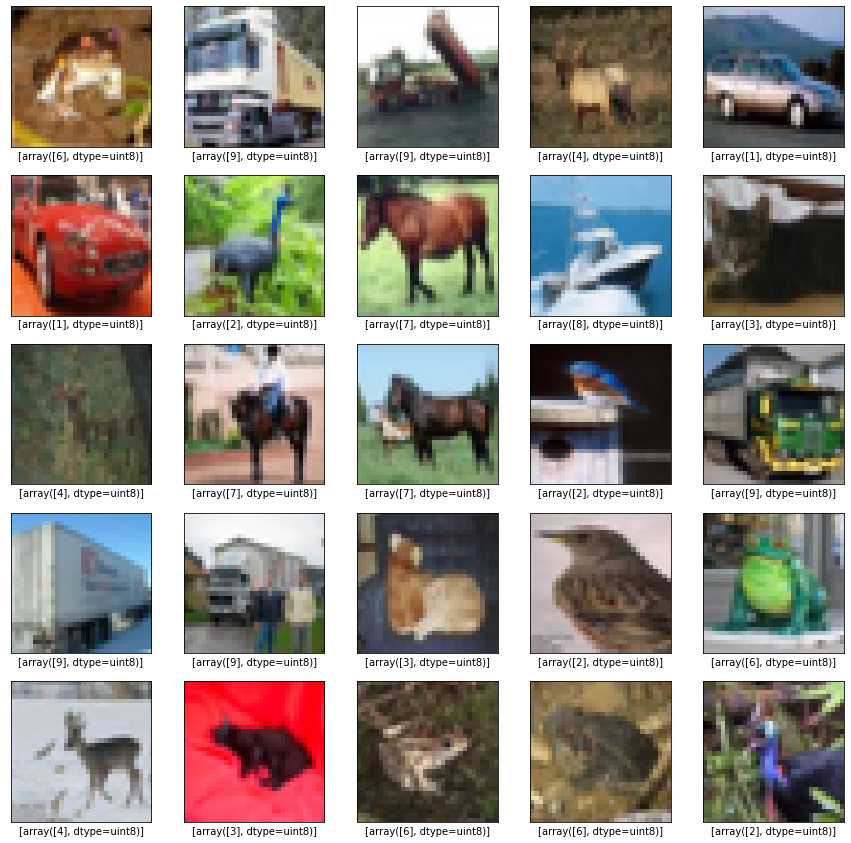

In [ ]:
# Plot some images
plt.figure(figsize=(15,15))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i])
  plt.xlabel([y_train[i]])
plt.show()

**Build The CNN Model**

In [ ]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(3,3),padding='same', activation='relu', input_shape=[32,32,3]))
model.add(Conv2D(filters=32, kernel_size=(3,3),padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1048704   
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

In [ ]:
history = model.fit(x_train, y_train, batch_size=32, epochs=5, verbose=1, validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 298s 6ms/sample - loss: 1.3815 - sparse_categorical_accuracy: 0.5046 - val_loss: 1.1172 - val_sparse_categorical_accuracy: 0.6034
Epoch 2/5
50000/50000 [==============================] - 301s 6ms/sample - loss: 1.0640 - sparse_categorical_accuracy: 0.6239 - val_loss: 0.9692 - val_sparse_categorical_accuracy: 0.6575
Epoch 3/5
50000/50000 [==============================] - 298s 6ms/sample - loss: 0.9428 - sparse_categorical_accuracy: 0.6672 - val_loss: 0.9271 - val_sparse_categorical_accuracy: 0.6734
Epoch 4/5
50000/50000 [==============================] - 300s 6ms/sample - loss: 0.8410 - sparse_categorical_accuracy: 0.7025 - val_loss: 0.9179 - val_sparse_categorical_accuracy: 0.6761
Epoch 5/5
50000/50000 [==============================] - 299s 6ms/sample - loss: 0.7717 - sparse_categorical_accuracy: 0.7288 - val_loss: 0.8555 - val_sparse_categorical_accuracy: 0.7011


**Plot Training Curves**

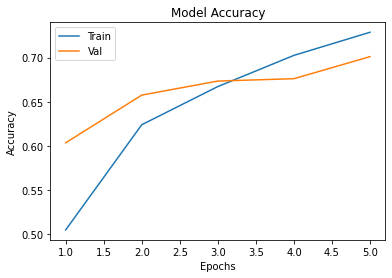

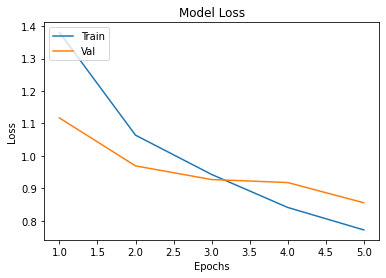

In [ ]:
epoch_range = range(1,6)
# Model Accuracy
plt.plot(epoch_range, history.history['sparse_categorical_accuracy'])
plt.plot(epoch_range, history.history['val_sparse_categorical_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'], loc = 'upper left')
plt.show()

# Model Loss
plt.plot(epoch_range, history.history['loss'])
plt.plot(epoch_range, history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'], loc = 'upper left')
plt.show()

**Plot Confusion Matrix**

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa4af2ba208>)

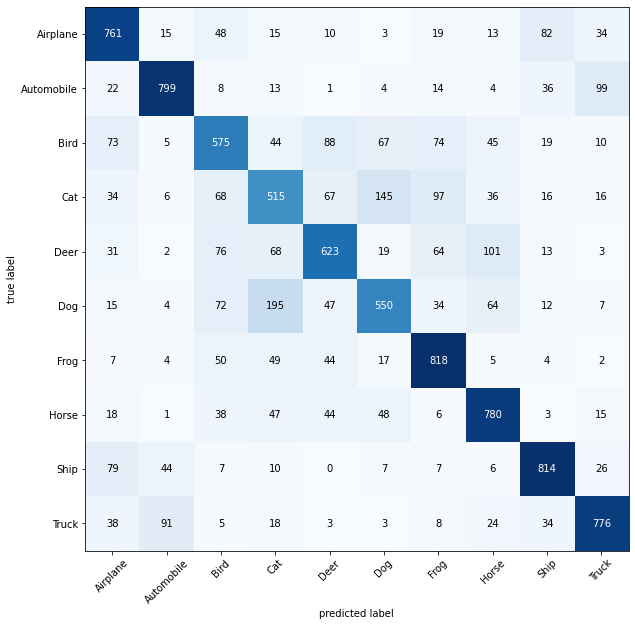

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

predictions = model.predict(x_test)

# Make Predictions
y_pred = model.predict_classes(x_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, figsize=(10,10), class_names=classes_names, cmap=plt.cm.Blues)

In [ ]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))

0.7011
